## Python Code for Cab-Fare Prediction Project

The following libraries are imported to be used in this project.

In [35]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
from datetime import datetime
from fancyimpute import KNN #For KNN imputation for missing value analysis
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pydotplus as pdp
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO 
import statsmodels.api as sm

### Dataset loding and analysing

In [60]:
#To set the current working directory
os.chdir("C:\\Users\\admin\\Desktop\\Aravi\\Data Science\\Important Notes\\EdWisor\\Assignments\\Project 2 - Cab Fare Prediction")

Using the following statement, the data can be loaded from the working directory.

In [80]:
cab_data = pd.read_csv("train_cab.csv")

In [81]:
cab_data.shape #This is used to find the dimensions of the dataset. So it contains 16067 rows and 7 columns.

(16067, 7)

In [82]:
#On analysis of the dataset, in 1125th observation, the fare_amount is in irregular format '430-'.
#So, let us change that value to 0 
#Even the date is in irregular format in 1328th row. So let us remove the row to avoid confusion

cab_data['fare_amount'].iloc[1123] = np.nan
cab_data = pd.concat([cab_data.iloc[:1327,:],cab_data.iloc[1328:,:]],axis=0)
df = cab_data.copy()

## Pre-Processing Techniques

### Missing Value Analysis

The missing value analysis is performed in the following block and the variables which are having missing values greater than 30% are dropped as per industry standards.

In [83]:
#Selected all the variables and checked for the number of missing values in each variable
cab_data = cab_data.replace(0,np.nan) #Even values denoted by zeros are treated as missing values
missing_val = pd.DataFrame(cab_data.isnull().sum()) 
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(cab_data))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
print ("Before missing value analysis:")
print (missing_val)

Before missing value analysis:
           Variables  Missing_percentage
0   pickup_longitude            1.960662
1    pickup_latitude            1.960662
2  dropoff_longitude            1.954438
3   dropoff_latitude            1.941989
4    passenger_count            0.697124
5        fare_amount            0.161832
6    pickup_datetime            0.000000


Here we can see that, only less than 2% of data are missing in all columns. We can even drop these rows and proceed, but around 320-350 rows will be dropped and it is better to impute those values. There are 2 methodologies through which these values can be imputed. They are using 'central tendency' or using 'KNN imputation method'.

Now let us find the best methodology for this dataset and so let us make a known value as NA and then check which methodology predicts it very closely.

For this dataset, let us take 280th sample data in random.

### passenger_count

In [7]:
passenger_count_missing_value = pd.DataFrame(columns={'Category','Value'})

In [8]:
# Here Mode is used, as the values are whole numbers and not continuous numbers.
passenger_count_missing_value['Category']= ['Actual Value','Median','Mode','KNN']

In [9]:
passenger_count_missing_value['Value'].iloc[0]=cab_data.iloc[279,6]

In [10]:
#Using Median
cab_data = df
cab_data = cab_data.replace(0,np.nan)
cab_data['passenger_count'].loc[279] = np.nan
cab_data['passenger_count'] = cab_data['passenger_count'].fillna(cab_data['passenger_count'].median())
passenger_count_missing_value['Value'].iloc[1]=cab_data.iloc[279,6]

C:\Users\admin\Anaconda3\envs\pyenv3.6.4\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
#Using Mode
cab_data = df
cab_data = cab_data.replace(0,np.nan)
cab_data['passenger_count'].loc[279] = np.nan
cab_data['passenger_count'] = cab_data['passenger_count'].fillna(cab_data['passenger_count'].mode()[0])
passenger_count_missing_value['Value'].iloc[2]=cab_data.iloc[279,6]

In [12]:
#Using KNN Imputation
cab_data = df
cab_data = cab_data.replace(0,np.nan)
cab_data['passenger_count'].loc[279] = np.nan
cab_data.iloc[:,6] = pd.Categorical(cab_data.iloc[:,6])
cab_data_new= pd.DataFrame(KNN(k=3).fit_transform(cab_data.iloc[:,[0,2,3,4,5,6]]), columns = cab_data.columns[[0,2,3,4,5,6]])

Imputing row 1/16067 with 0 missing, elapsed time: 272.752
Imputing row 101/16067 with 0 missing, elapsed time: 295.412
Imputing row 201/16067 with 0 missing, elapsed time: 300.303
Imputing row 301/16067 with 0 missing, elapsed time: 303.974
Imputing row 401/16067 with 0 missing, elapsed time: 305.349
Imputing row 501/16067 with 0 missing, elapsed time: 306.537
Imputing row 601/16067 with 0 missing, elapsed time: 307.287
Imputing row 701/16067 with 0 missing, elapsed time: 310.271
Imputing row 801/16067 with 0 missing, elapsed time: 311.584
Imputing row 901/16067 with 0 missing, elapsed time: 312.334
Imputing row 1001/16067 with 0 missing, elapsed time: 312.990
Imputing row 1101/16067 with 0 missing, elapsed time: 312.990
Imputing row 1201/16067 with 0 missing, elapsed time: 313.130
Imputing row 1301/16067 with 0 missing, elapsed time: 314.943
Imputing row 1401/16067 with 1 missing, elapsed time: 315.662
Imputing row 1501/16067 with 0 missing, elapsed time: 315.755
Imputing row 1601/16

Imputing row 13201/16067 with 0 missing, elapsed time: 343.025
Imputing row 13301/16067 with 0 missing, elapsed time: 344.167
Imputing row 13401/16067 with 0 missing, elapsed time: 345.123
Imputing row 13501/16067 with 0 missing, elapsed time: 345.140
Imputing row 13601/16067 with 0 missing, elapsed time: 345.387
Imputing row 13701/16067 with 0 missing, elapsed time: 345.405
Imputing row 13801/16067 with 0 missing, elapsed time: 345.413
Imputing row 13901/16067 with 0 missing, elapsed time: 345.416
Imputing row 14001/16067 with 0 missing, elapsed time: 345.422
Imputing row 14101/16067 with 0 missing, elapsed time: 345.429
Imputing row 14201/16067 with 0 missing, elapsed time: 346.221
Imputing row 14301/16067 with 0 missing, elapsed time: 347.273
Imputing row 14401/16067 with 0 missing, elapsed time: 348.031
Imputing row 14501/16067 with 0 missing, elapsed time: 348.031
Imputing row 14601/16067 with 0 missing, elapsed time: 348.764
Imputing row 14701/16067 with 0 missing, elapsed time: 

In [ ]:
cab_data = pd.concat([cab_data_new.iloc[:,0],cab_data.iloc[:,1],cab_data_new.iloc[:,1:6]], axis = 1)
cab_data.iloc[:,6]=cab_data.iloc[:,6].round()
passenger_count_missing_value['Value'].iloc[3]=cab_data.iloc[279,6]

In [19]:
print ("Passenger_count missing values imputation method status: \n")
print (passenger_count_missing_value)

Passenger_count missing values imputation method status: 

       Category  Value
0  Actual Value    2.0
1        Median    1.0
2          Mode    1.0
3           KNN    2.0


From these three methods, we can find that the KNN imputation method performs better when compared to the other methods. So we can take the values imputed by KNN imputation method for predicting missing values for this dataset.

After the missing value analysis, let us check the total number of missing values in the dataset.

In [23]:
missing_val = pd.DataFrame(cab_data.isnull().sum()) 
missing_val = missing_val.reset_index()
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(cab_data))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
print("KNN imputation is the best method.")
print ("After missing value analysis:")
print (missing_val)

           Variables  Missing_percentage
0        fare_amount                 0.0
1    pickup_datetime                 0.0
2   pickup_longitude                 0.0
3    pickup_latitude                 0.0
4  dropoff_longitude                 0.0
5   dropoff_latitude                 0.0
6    passenger_count                 0.0


Now, as the missing values have completely been handled, we can proceed with the next pre-processing technique.

### Outlier Analysis

In Outlier analysis, first let us visualise the outliers present in the variables using Box and Whisker plots

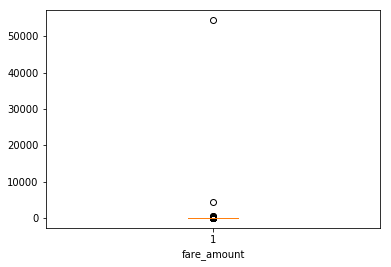

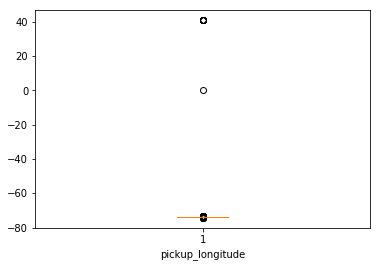

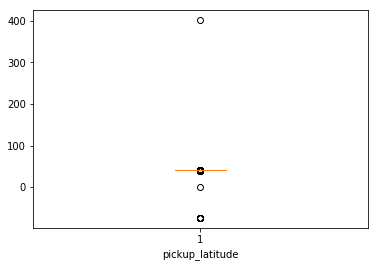

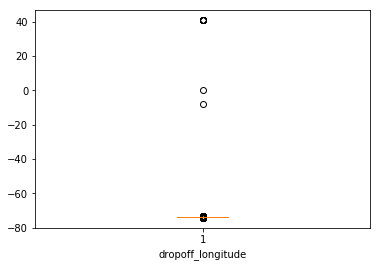

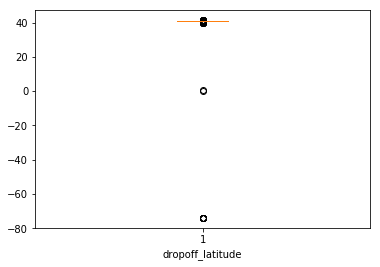

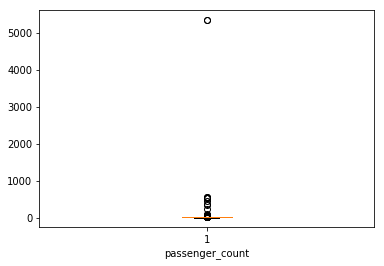

In [4]:
#Creating Box and Whisker plots to check for outliers
print("Outlier Analysis is carried out")
for i in [0,2,3,4,5,6]:
    plt.boxplot(cab_data.iloc[:,i])
    plt.xlabel(cab_data.columns[i])
    plt.show()

Now. we will remove the outliers from all the variables except 'pickup_datetime' and replace them with imputed data using knn imputation method.

In [8]:
#Handling Outliers using KNN Imputation method

#Taking copy of data and initiating the variables to handle

df=cab_data.copy()
cnames = ["fare_amount","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"] 

#Detect outliers and replace with NA

for i in cnames:
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    low = q25 - (iqr*1.5)
    high = q75 + (iqr*1.5)
    df.loc[df[i] < low,i] = np.nan
    df.loc[df[i] > high,i] = np.nan


missing_val = pd.DataFrame(df.loc[:,cnames].isnull().sum())
missing_val.columns = ["Outliers"] 
print (missing_val)  #displays number of outliers in the variables

                   Outliers
fare_amount            1397
pickup_longitude        831
pickup_latitude         532
dropoff_longitude       945
dropoff_latitude        778
passenger_count        1703


Now, as there are many outlier data points very close to the main range, we can omit only those values beyond the main range depending upon the variables.

In [17]:
df=cab_data.copy()

df.loc[df['fare_amount']>1000,'fare_amount'] = np.nan
df.loc[df['pickup_longitude']>-60,'pickup_longitude'] = np.nan
df.loc[df['pickup_latitude']>100,'pickup_latitude'] = np.nan
df.loc[df['pickup_latitude']<10,'pickup_latitude'] = np.nan
df.loc[df['dropoff_longitude']>-60,'dropoff_longitude'] = np.nan
df.loc[df['dropoff_latitude']<20,'dropoff_latitude'] = np.nan

#Generally, in a cab, maximum 7 passengers can be boarded at a time. 
#So those values beyond 7 can be omitted in 'passenger_count' variable

df.loc[df['passenger_count']>7,'passenger_count'] = np.nan


In [ ]:
#Imputing the outliers with KNN
cab_data_out= pd.DataFrame(KNN(k=3).fit_transform(df.iloc[:,[0,2,3,4,5,6]]), df = cab_data.columns[[0,2,3,4,5,6]])

C:\Users\admin\Anaconda3\envs\pyenv3.6.4\lib\site-packages\fancyimpute-0.4.2-py3.6.egg\fancyimpute\solver.py:58: UserWarning: Input matrix is not missing any values


In [ ]:
cab_data = pd.concat([cab_data_out.iloc[:,0],cab_data.iloc[:,1],cab_data_out.iloc[:,1:6]], axis = 1)

In [20]:
#Checking the missing values after KNN imputation
cnames = ["fare_amount","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"] 
missing_val = pd.DataFrame(cab_data.loc[:,cnames].isnull().sum())
missing_val.columns = ["Missing Values"] 
missing_val    #displays number of outliers in the three variables

,Missing Values
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


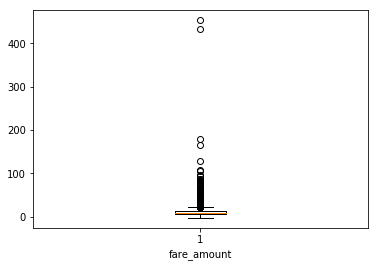

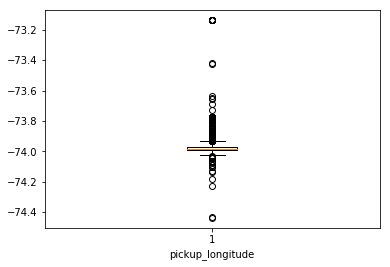

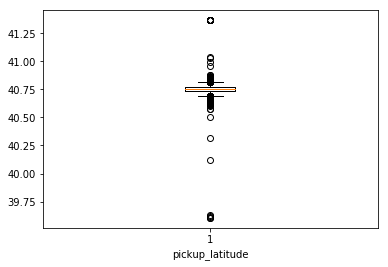

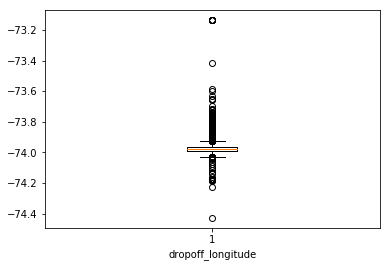

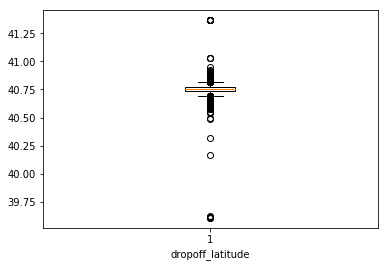

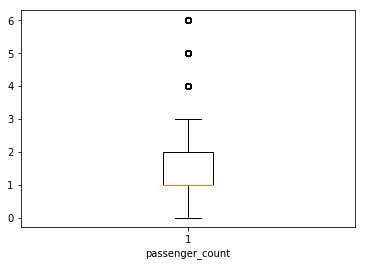

In [21]:
#Creating Box and Whisker plots to check for outliers after Knn imputation
for i in [0,2,3,4,5,6]:
    plt.boxplot(cab_data.iloc[:,i])
    plt.xlabel(cab_data.columns[i])
    plt.show()

After handling the basic outliers, let us find the distance travelled using latitude and longitude points using haversine formula and then handle the remaining outliers for efficient processing. 

In [85]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r
for i in range(0,cab_data.shape[0]):
    cab_data.loc[i,'distance_travelled']=haversine(cab_data.loc[i,'pickup_longitude'],cab_data.loc[i,'pickup_latitude'],cab_data.loc[i,'dropoff_longitude'],cab_data.loc[i,'dropoff_latitude'])
    

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance_travelled
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [86]:
#From here let us consider only the distance_travelled and omit latitude and longitude details
cab_data = pd.concat([cab_data.iloc[:,0:2],cab_data.iloc[:,6:8]], axis = 1)

Now let us convert the date time data into proper format and extract the time and date details.

In [ ]:
cab_data["pickup_datetime"]= pd.to_datetime(cab_data["pickup_datetime"], format= "%Y-%m-%d %H:%M:%S UTC")

In [90]:
cab_data['Year'] = cab_data['pickup_datetime'].dt.year
cab_data['Month'] = cab_data['pickup_datetime'].dt.month
cab_data['Day'] = cab_data['pickup_datetime'].dt.day
cab_data['Hour'] = cab_data['pickup_datetime'].dt.hour
cab_data['Time'] = cab_data['pickup_datetime'].dt.time

In [132]:
cab_data = pd.concat([cab_data.iloc[:,0:1],cab_data.iloc[:,2:9]], axis = 1)

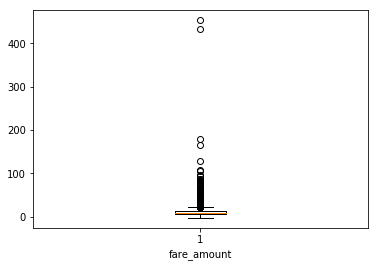

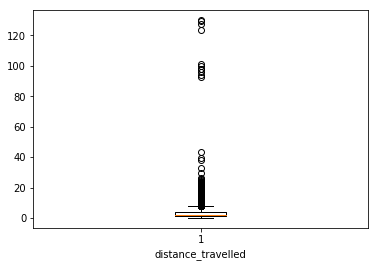

In [95]:
#Creating Box and Whisker plots to check for outliers in the fare_amount and distance_travelled data
for i in [0,2]:
    plt.boxplot(cab_data.iloc[:,i])
    plt.xlabel(cab_data.columns[i])
    plt.show()

In [96]:
#Now, these outliers are handled using KNN imputation method.
df=cab_data.copy()
cnames = ["fare_amount","distance_travelled"] 

#Detect outliers and replace with NA

for i in cnames:
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    low = q25 - (iqr*1.5)
    high = q75 + (iqr*1.5)
    df.loc[df[i] < low,i] = np.nan
    df.loc[df[i] > high,i] = np.nan


missing_val = pd.DataFrame(df.loc[:,cnames].isnull().sum())
missing_val.columns = ["Outliers"] 
print (missing_val) 

                    Outliers
fare_amount             1395
distance_travelled      1378


In [ ]:
cab_data_out= pd.DataFrame(KNN(k=3).fit_transform(df.iloc[:,[0,2]]), columns = df.columns[[0,2]])
cab_data = pd.concat([cab_data_out.iloc[:,:],cab_data.iloc[:,1],cab_data.iloc[:,3:]], axis = 1)

In [150]:
print("After outlier analysis and formatting, the dataset looks like this:")
cab_data.head()

After outlier analysis and formatting, the dataset looks like this:


,fare_amount,distance_travelled,passenger_count,Year,Month,Day,Hour,Time
0,4.5,1.030764,1,2009,6,15,17.0,17:26:21
1,16.9,4.827250,1,2010,1,5,16.0,16:52:16
2,5.7,1.389525,2,2011,8,18,0.0,00:35:00
3,7.7,2.799270,1,2012,4,21,4.0,04:30:42
4,5.3,1.999157,1,2010,3,9,7.0,07:51:00


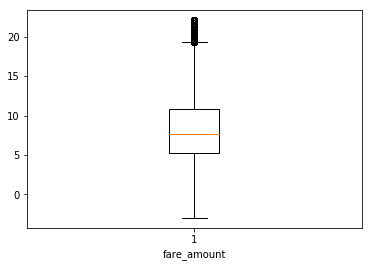

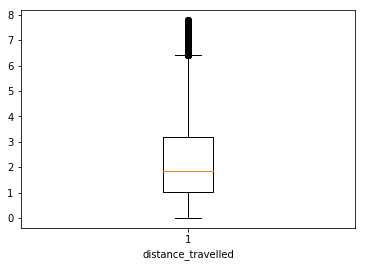

In [101]:
#Creating Box and Whisker plots to check for outliers after Knn imputation
for i in [0,1]:
    plt.boxplot(cab_data.iloc[:,i])
    plt.xlabel(cab_data.columns[i])
    plt.show()

Here, we can find that, the outliers in 'fare_amount' and 'distance_travelled' have been considerably reduced and brought close to the whiskers of the plot. Hence these outliers are not again treated and they are considered as part of data as they wont bias the model.
Now, outliers have been efficiently handled and we can move on to the next preprocessing technique.

### Feature Selection

Correlation analysis for forming the heatmap based on correlation matrix

In [159]:
print("Feature selection is under process:")

Feature selection is under process:


In [151]:
#Formation of Correlation Matrix

cor = cab_data.iloc[:,:].corr()
cor

,fare_amount,distance_travelled,passenger_count,Year,Month,Day,Hour
fare_amount,1.000000,0.840294,0.008608,0.106450,0.011516,-0.007543,0.010633
distance_travelled,0.840294,1.000000,0.001661,-0.002823,-0.001920,-0.004798,0.010409
passenger_count,0.008608,0.001661,1.000000,0.003072,0.011074,0.002194,0.006874
Year,0.106450,-0.002823,0.003072,1.000000,-0.117329,-0.026561,0.000810
Month,0.011516,-0.001920,0.011074,-0.117329,1.000000,-0.015633,0.000092
Day,-0.007543,-0.004798,0.002194,-0.026561,-0.015633,1.000000,0.000754
Hour,0.010633,0.010409,0.006874,0.000810,0.000092,0.000754,1.000000


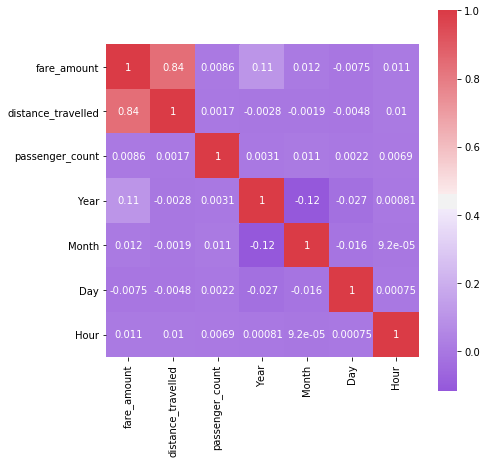

In [152]:
#Fixing the figure size and generating heatmap
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(cor,square=True,annot=True,cmap=sns.diverging_palette(1000, 10, as_cmap=True), ax=ax)

From the heatmap, we can find that 'distance_travelled' is highly correlated with the 'fare_amount', but the remaining variables are not correlated with any of dependent and independent variables.

But, as the variables 'passenger_count','Year', 'Month', 'Day' are considered categorical and 'fare_amount' is numeric, we can take the ANOVA test for feature selection.

In [156]:
#F-statistic and p-value
F_val, pval = f_classif(cab_data.iloc[:,2:6],cab_data['fare_amount'])

In [157]:
print("F-statistic value:")
print(F_val)

F-statistic value:
[ 0.92037653 40.60386051  1.32546726  0.96317668]


In [158]:
print("p-value:")
print(pval)

p-value:
[8.72683457e-01 0.00000000e+00 1.31281529e-05 6.93800495e-01]


Let us have a p-value threshold of 0.05. Those below 0.05 can be selected for modelling phase. 
So, going forward, we can have 'distance_travelled','Year','Month' and 'fare_amount' data in the dataset.

In [161]:
cab_data=cab_data.iloc[:,[1,3,4,0]]

In [164]:
print(cab_data.head())

,distance_travelled,Year,Month,fare_amount
0,1.030764,2009,6,4.5
1,4.827250,2010,1,16.9
2,1.389525,2011,8,5.7
3,2.799270,2012,4,7.7
4,1.999157,2010,3,5.3


### Feature Scaling

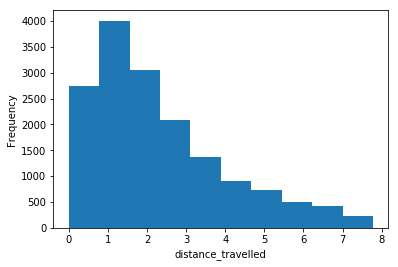

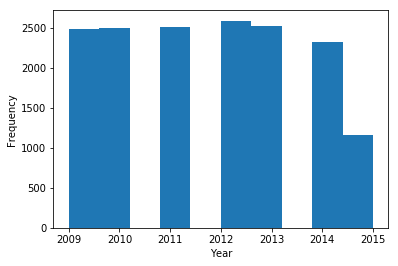

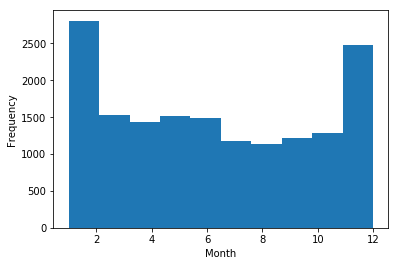

In [166]:
#Let us check the distribution of independent variables
print ("Feature scaling is in progress:")
norm_var = ["distance_travelled","Year","Month"]
for i in norm_var:
    plt.hist(cab_data[i])
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

As all the variables are not normally distributed, let us use 'Normalization' for feature scaling

In [167]:
norm_var = ["distance_travelled","Year","Month"]
for i in norm_var:
    cab_data[i] = (cab_data[i] - min(cab_data[i]))/(max(cab_data[i]) - min(cab_data[i]))

In [169]:
print("After all the pre-processing techniques, the dataset is as follows:")
print(cab_data.head())

After all the pre-processing techniques, the dataset is as follows:


,distance_travelled,Year,Month,fare_amount
0,0.132538,0.000000,0.454545,4.5
1,0.620698,0.166667,0.000000,16.9
2,0.178668,0.333333,0.636364,5.7
3,0.359936,0.500000,0.272727,7.7
4,0.257056,0.166667,0.181818,5.3


Now the data is completely Normalised and the basic pre processing is completed and the dataset is ready for the Modelling phase.

## Modeling

### Error Metric

In this project, we are going to use RMSE, R-squared and Adjusted R-squared values as the error metrics to measure the performance of the model. The reason behind this is given in the documentation.

In [186]:
#Defining RMSE, R-squared and Adjusted R-squared
print("Modeling phase has started:")
def rmse(actual, predicted):
    result = (np.mean((actual-predicted)**2))**0.5
    return result

def rsq(actual, predicted):
    result = 1-(sum((actual-predicted)**2)/sum((np.mean(actual)-predicted)**2))
    return result

def adjrsq(rsq,n,k):
    result = 1-((1-rsq)*(n-1)/(n-k-1))
    return result

### Linear Regression
The first simple model is the Linear Regression

In [171]:
#Sampling the data for training and testing purposes
train_data, test_data = train_test_split(cab_data, test_size=0.2)

In [172]:
#Model generation
reg_model = sm.OLS(train_data.iloc[:,3],train_data.iloc[:,0:3]).fit()

In [173]:
#Generating predictions based on the model
reg_predictions = reg_model.predict(test_data.iloc[:,0:3])

In [194]:
#Evaluating the model
print("Linear Regression model status")
print("RMSE - " + str(rmse(test_data.iloc[:,3],reg_predictions)))
print("R-squared - " + str(reg_model.rsquared))
print("Adjusted R-squared - " + str(reg_model.rsquared_adj))

Linear Regression model
RMSE - 2.6492448207402393
R-squared - 0.9267818428128624
Adjusted R-squared - 0.9267647477493117


In [196]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 5.421e+04
Date:                Thu, 27 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:43:05   Log-Likelihood:                -30463.
No. Observations:               12852   AIC:                         6.093e+04
Df Residuals:                   12849   BIC:                         6.095e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
distance_travelled    19.1451      0.090    212.015      0.000      18.968      19.322
Year                   3.2769      0.060     55.031      0.000       3.160       3.394
Month                  2.0063      0.058     34.708      0.000       1.893       2.120
==============================================================================
Omnibus:                     2074.540   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9156.902
Skew:                           0.731   Prob(JB):                         0.00
Kurtosis:                       6.868   Cond. No.                         3.30
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

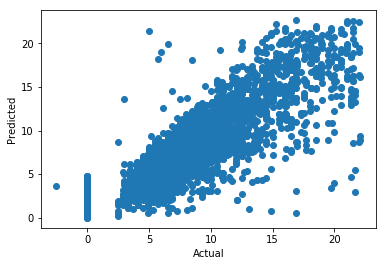

In [197]:
#Scatter plot to visualise cnt variable predictions
plt.scatter(test_data.iloc[:,3],reg_predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

### Decision Tree

The next model is the decision tree.

In [209]:
#We can use the same train and test data here
tree_model = DecisionTreeRegressor(max_depth = 5).fit(train_data.iloc[:,0:3],train_data.iloc[:,3])

In [210]:
#Generating predictions based on the model
tree_predictions = tree_model.predict(test_data.iloc[:,0:3])

In [211]:
#Evaluating the model
print("Decision Tree model status")
print("RMSE - " + str(rmse(test_data.iloc[:,3],tree_predictions)))
rsq_value = rsq(test_data.iloc[:,3],tree_predictions)
print("R-squared - " + str(rsq_value))
print("Adjusted R-squared - " + str(adjrsq(rsq_value,cab_data.shape[0],cab_data.shape[1])))

Decision Tree model status
RMSE - 2.3691790815859632
R-squared - 0.7459135360031033
Adjusted R-squared - 0.7458502556434752


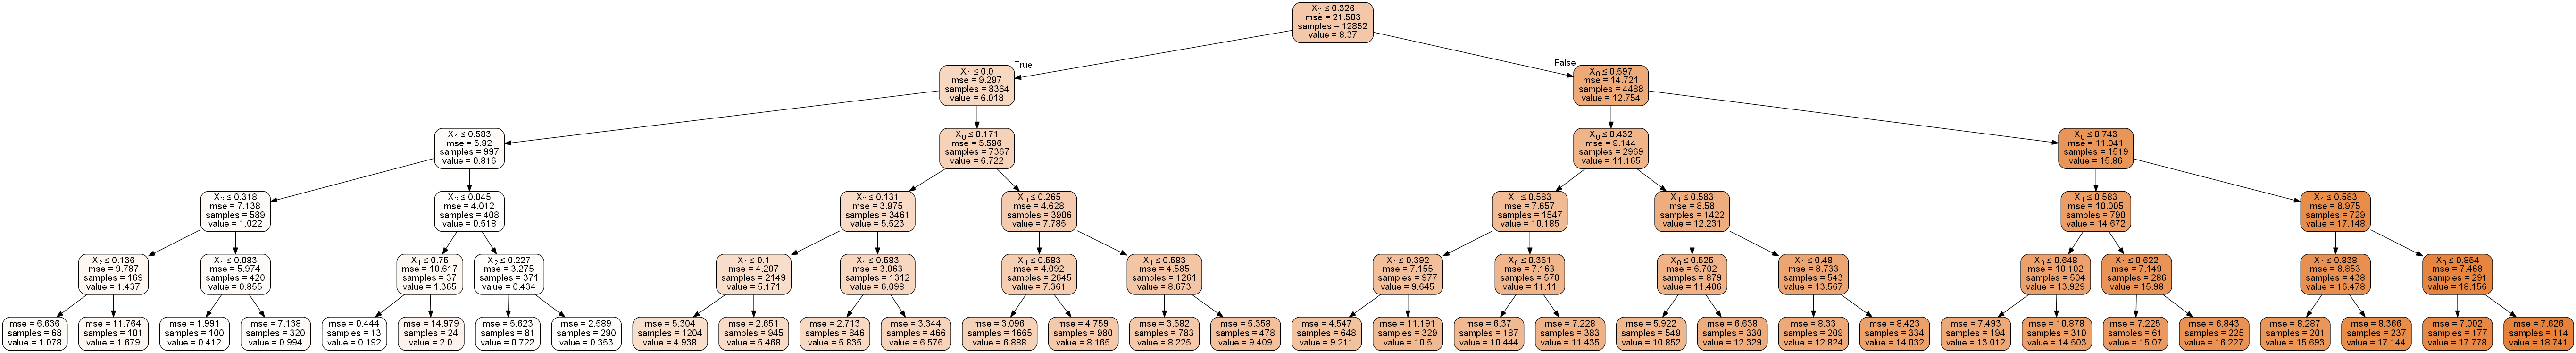

In [213]:
#To visualise a decision tree
dot_data = StringIO()
export_graphviz(tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pdp.graph_from_dot_data(dot_data.getvalue())  
graph.write_png("DT.png") #The decision tree is exported to the directory as png file
Image(graph.create_png())

### Random Forest

The next model is the Random Forest

In [214]:
#We can use the same train and test data here too
forest_model = RandomForestRegressor(n_estimators = 10).fit(train_data.iloc[:,0:3],train_data.iloc[:,3])

In [215]:
#Generating predictions based on the model
forest_predictions = forest_model.predict(test_data.iloc[:,0:3])

In [216]:
#Evaluating the model
print("Random Forest model status")
print("RMSE - " + str(rmse(test_data.iloc[:,3],forest_predictions)))
rsq_value = rsq(test_data.iloc[:,3],forest_predictions)
print("R-squared - " + str(rsq_value))
print("Adjusted R-squared - " + str(adjrsq(rsq_value,cab_data.shape[0],cab_data.shape[1])))

Random Forest model status
RMSE - 2.5821708852392735
R-squared - 0.6982004069596521
Adjusted R-squared - 0.6981252436216183


Based on the error metrics and goodness of fit metrics, Linear Regression model is better when compared to the other two models. So Linear Regression model is selected for this dataset.

So, we shall use the Linear Regression model to predict the cab fare for our future expansion.

### Output

Using Linear Regression model, let us predict the fare amount using data in test.csv.

In [231]:
#Loading the test dataset
test = pd.read_csv("test.csv")

In [232]:
df = test.copy()

In [233]:
#Calculating distance travelled
for i in range(0,df.shape[0]):
    df.loc[i,'distance_travelled']=haversine(df.loc[i,'pickup_longitude'],df.loc[i,'pickup_latitude'],df.loc[i,'dropoff_longitude'],df.loc[i,'dropoff_latitude'])

In [234]:
#Fetching Year and Month from timestamp
df["pickup_datetime"]= pd.to_datetime(df["pickup_datetime"], format= "%Y-%m-%d %H:%M:%S UTC")

In [235]:
df['Month'] = df['pickup_datetime'].dt.month
df['Year'] = df['pickup_datetime'].dt.year

In [236]:
df = df.loc[:,['distance_travelled','Year','Month']]

In [237]:
#Normalising the data
norm_var = ["distance_travelled","Year","Month"]
for i in norm_var:
    df[i] = (df[i] - min(df[i]))/(max(df[i]) - min(df[i]))

In [238]:
#Predicting the fare based on the test dataset and Regression model
fare = reg_model.predict(df.iloc[:,0:3])

In [241]:
test['fare_amount']=fare

In [242]:
#Exporting to csv
test.to_csv("Python Test Output.csv",index=None)

In [243]:
print("The test data is invoked and fare_amount is predicted")
print(test.head())

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,3.721734
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,3.741281
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,2.852292
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,4.020248
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,4.676235


Thus, using the Linear Regression Model that we have developed, we can predict the cab fare based on latitude, longitude and timestamp data.